In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('/kaggle/input/forest/Fdata.csv')

df.head()



,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    object 
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    object 
 13  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.5+ KB


In [4]:
## data clenning process
##df[df.isnull().any(axis=1)]
df.isnull().sum()


day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [5]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
43,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [6]:
df=df.dropna().reset_index(drop=True)
##df=df.drop(43).reset_index(drop=True)

In [7]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [8]:
##remove extra spaces in columns 
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [9]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [10]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [11]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          121 non-null    int64  
 1   month        121 non-null    int64  
 2   year         121 non-null    int64  
 3   Temperature  121 non-null    int64  
 4   RH           121 non-null    int64  
 5   Ws           121 non-null    int64  
 6   Rain         121 non-null    float64
 7   FFMC         121 non-null    float64
 8   DMC          121 non-null    float64
 9   DC           121 non-null    float64
 10  ISI          121 non-null    float64
 11  BUI          121 non-null    float64
 12  FWI          121 non-null    float64
 13  Classes      121 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.4+ KB


In [13]:
#let save the clenning dataset
df.to_csv('Fdata.csv',index=False)

In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [15]:
 df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [16]:
df=df.drop(columns=['day','year'],errors='ignore')
df.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,6,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,6,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,6,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,6,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0
4,6,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0


/tmp/ipykernel_13/2649319599.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


array([[<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'Ws'}>, <Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'BUI'}>, <Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>]], dtype=object)

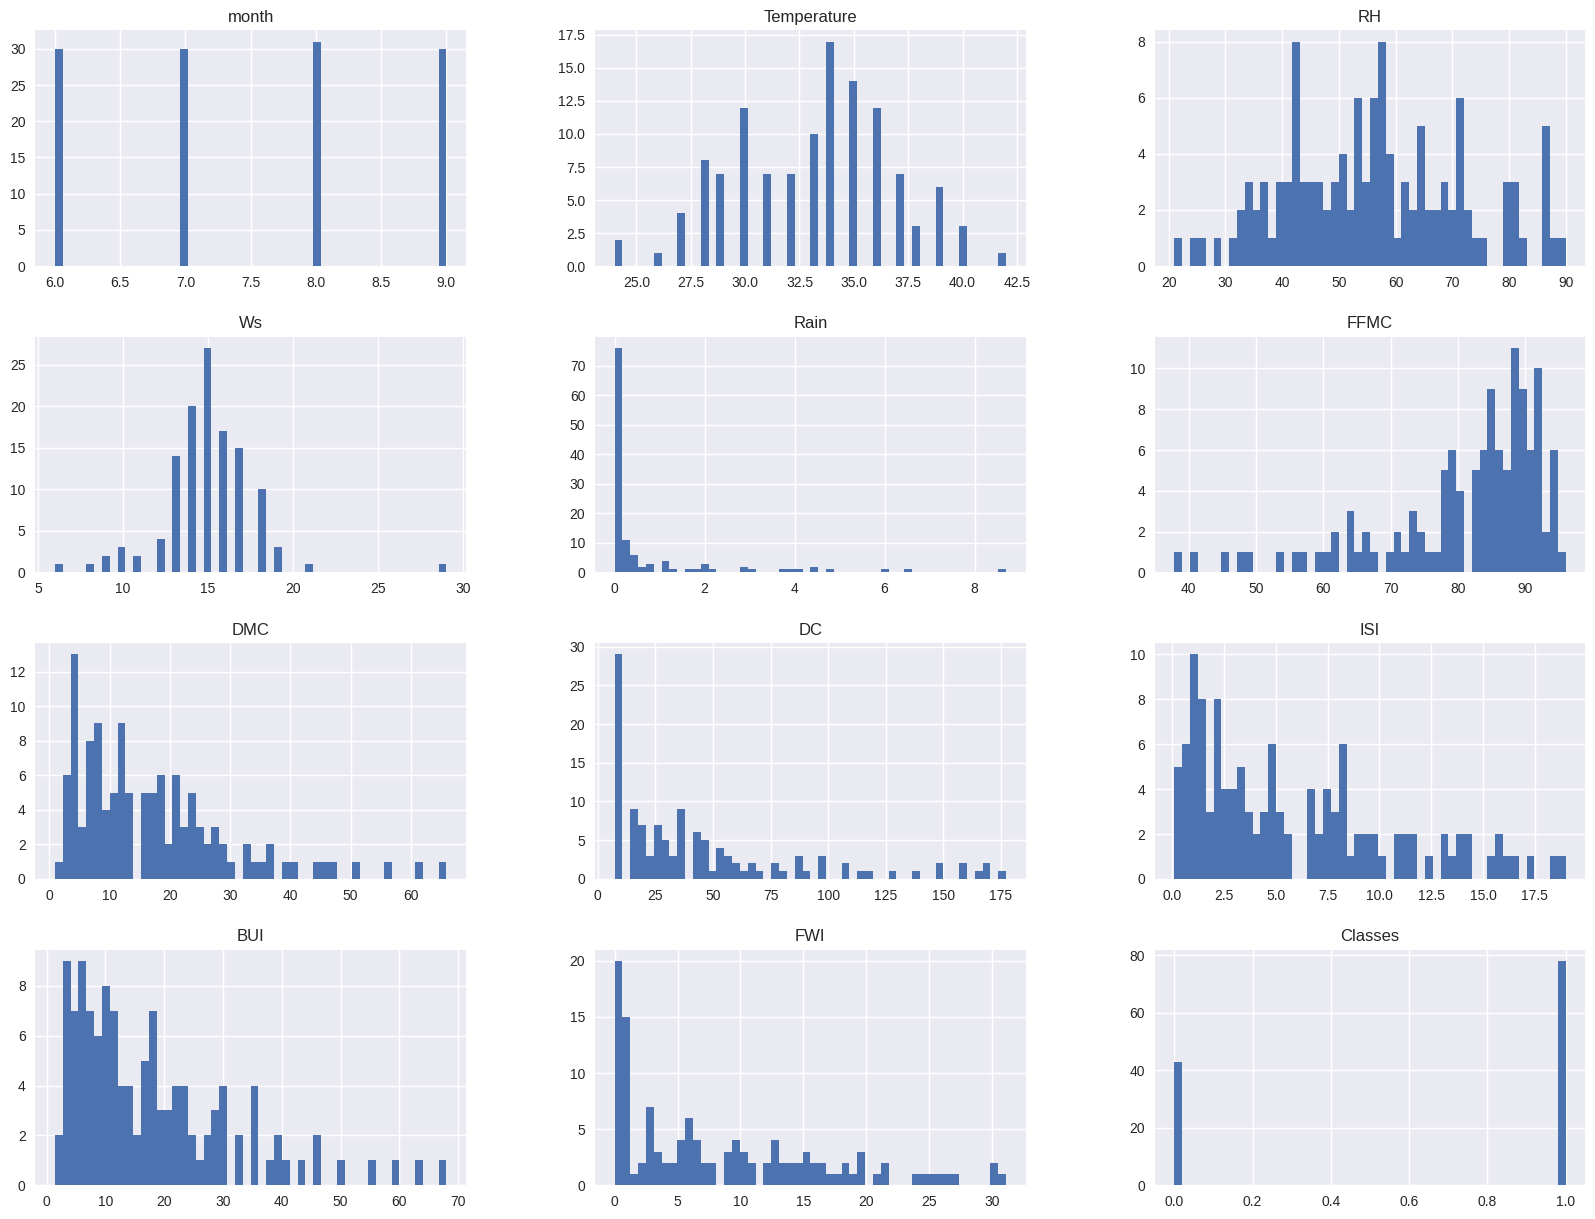

In [17]:
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))


In [18]:
percentage=df['Classes'].value_counts(normalize=True)*100

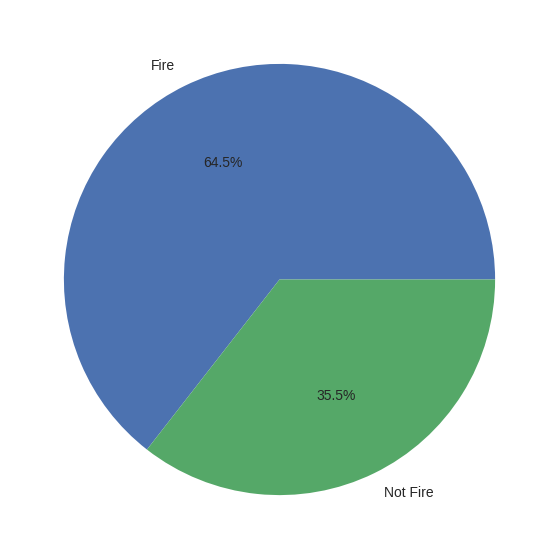

In [19]:
import matplotlib.pyplot as plt

classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title=("Pie chart of classes")
plt.show()

In [20]:
df.corr()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
month,1.000000,-0.081214,-0.014020,-0.074744,-0.141439,0.090941,0.135642,0.289513,0.119994,0.183899,0.147953,0.118970
Temperature,-0.081214,1.000000,-0.594127,-0.270491,-0.127553,0.571143,0.394472,0.292707,0.535954,0.373088,0.500971,0.498754
RH,-0.014020,-0.594127,1.000000,0.154297,0.146750,-0.644134,-0.384730,-0.275144,-0.691191,-0.367170,-0.605856,-0.440500
Ws,-0.074744,-0.270491,0.154297,1.000000,-0.137527,-0.025478,0.031887,0.023962,0.128558,0.033553,0.106128,0.046994
Rain,-0.141439,-0.127553,0.146750,-0.137527,1.000000,-0.509872,-0.349583,-0.347646,-0.412636,-0.359493,-0.410213,-0.474590
FFMC,0.090941,0.571143,-0.644134,-0.025478,-0.509872,1.000000,0.584221,0.486333,0.752513,0.580449,0.719593,0.795500
DMC,0.135642,0.394472,-0.384730,0.031887,-0.349583,0.584221,1.000000,0.882487,0.631017,0.987926,0.852193,0.537094
DC,0.289513,0.292707,-0.275144,0.023962,-0.347646,0.486333,0.882487,1.000000,0.474039,0.927774,0.716965,0.464827
ISI,0.119994,0.535954,-0.691191,0.128558,-0.412636,0.752513,0.631017,0.474039,1.000000,0.612286,0.916427,0.696190
BUI,0.183899,0.373088,-0.367170,0.033553,-0.359493,0.580449,0.987926,0.927774,0.612286,1.000000,0.844715,0.548840


<Axes: >

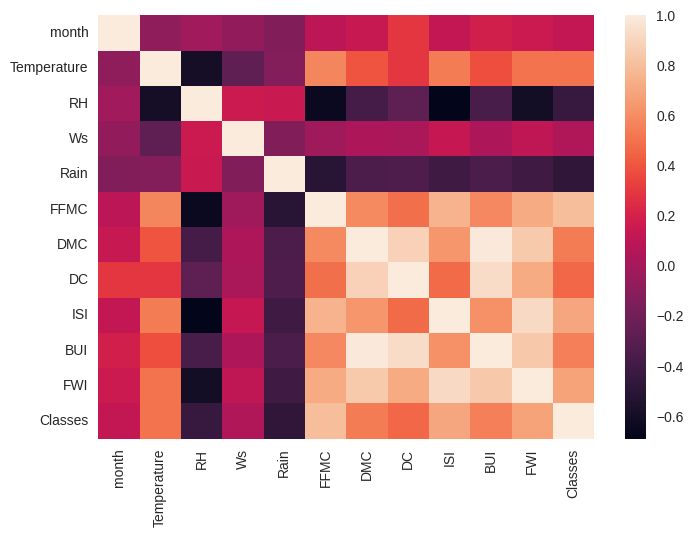

In [21]:
sns.heatmap(df.corr())

<Axes: >

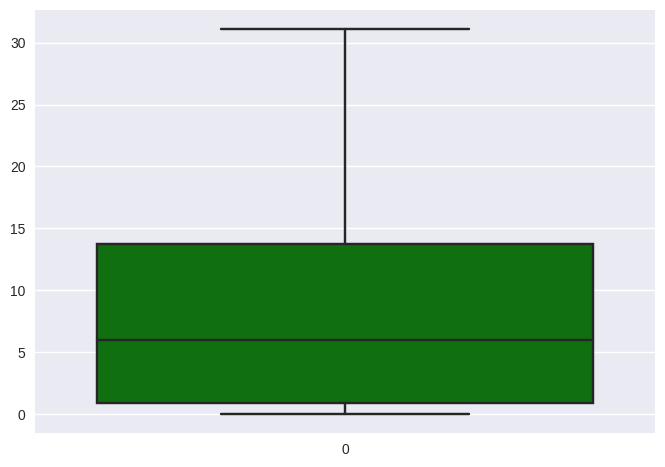

In [22]:
# Box plot
sns.boxplot(df['FWI'],color='green')

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  

df['Classes'] = np.where(df['Classes'].astype(str).str.contains('not fire','fire'),
                         'not fire','fire')


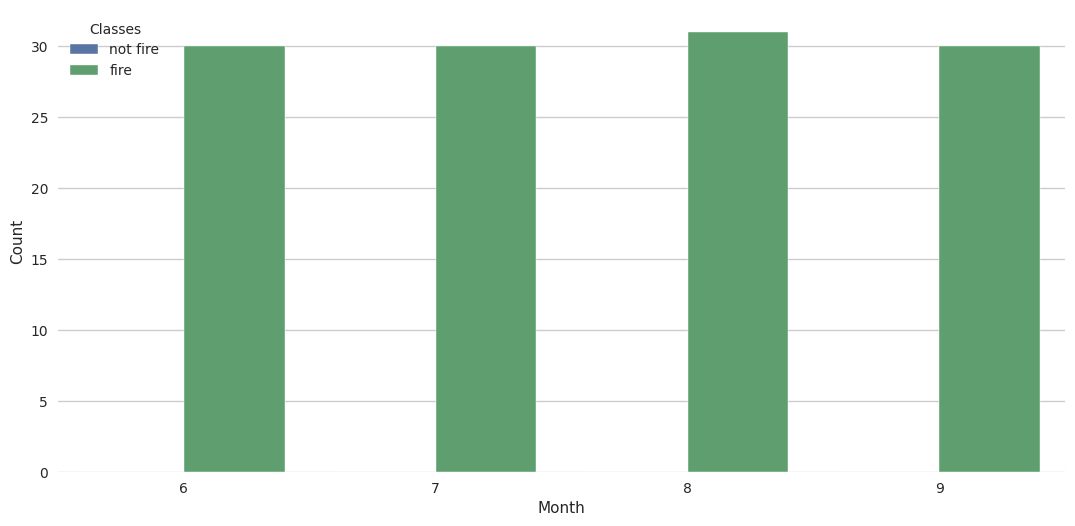

In [24]:
plt.figure(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=df, hue_order=['not fire', 'fire'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Classes')
plt.show()

